In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Define the path
path = 'D:\\MultiModal\\Face_z_score\\G_1\\'
save_path = 'D:\\MultiModal\\Face_z_score\\G_plot\\'
if not os.path.exists(save_path):
    os.makedirs(save_path) 

# Define the lists
weeks = ['1W','2W','3W','4W']  # '2W', '3W', '4W'
steps = ['S1', 'S2', 'S3']  # 'S2', 'S3'
people = ['G1', 'G2', 'G3', 'G4']

for week in weeks:
    for step in steps:
        
        temp = {}
        
        for person in people:
            file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
            if os.path.exists(file_path):
                df = pd.read_excel(file_path, index_col=0)
                
                df['box.size'] = df['box.height'] * df['box.width']
                # data sampling ,  1000번째에 찍기 
                df = df.iloc[::1000, :]
                temp[person] = df

        # Plot the data
        plt.figure(figsize=(12, 8))

        for person in people:
            if person in temp:
                df = temp[person]
                plt.plot(df.index, df['box.size'], label=person)

        plt.xlabel('Time')
        plt.ylabel('Box Size')
        plt.title(f'{week}_{step} graph')
        plt.legend()

        # Show the plot
        #plt.show()
        
        # Save the plot to the specified path
        plot_filename = f"{week}_{step}_graph.png"
        plot_filepath = os.path.join(save_path, plot_filename)
        plt.savefig(plot_filepath)
        plt.close()  # Close the plot to avoid display

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missin

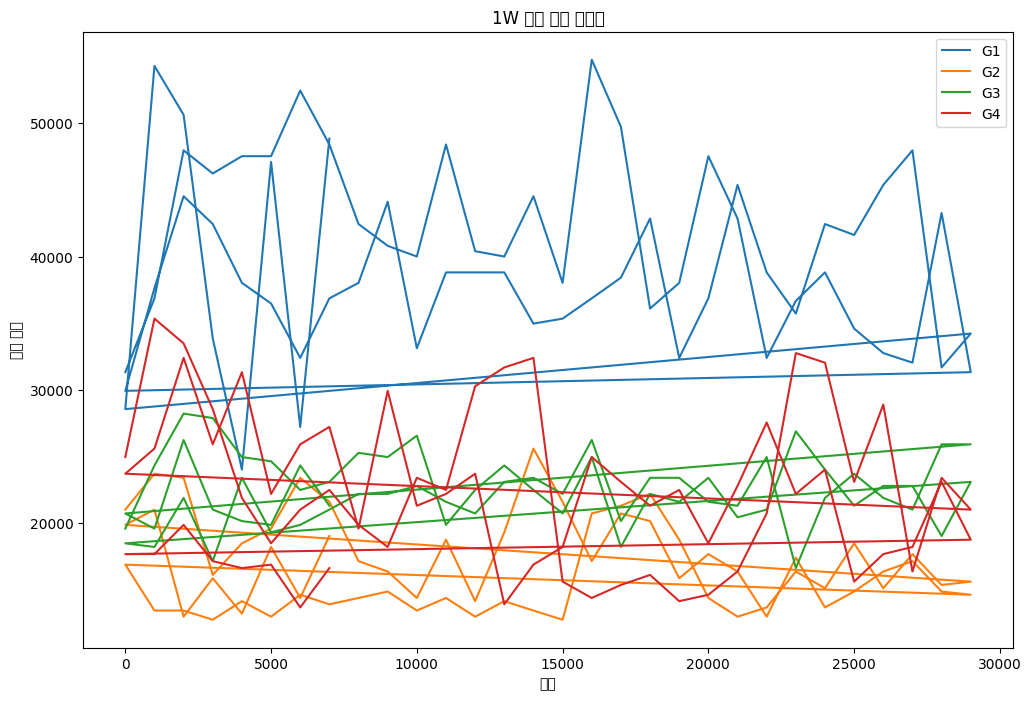

파일을 찾을 수 없습니다: D:\MultiModal\Face_z_score\G_1\Face_2W_G3_S2.xlsx
파일을 찾을 수 없습니다: D:\MultiModal\Face_z_score\G_1\Face_2W_G3_S3.xlsx


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missin

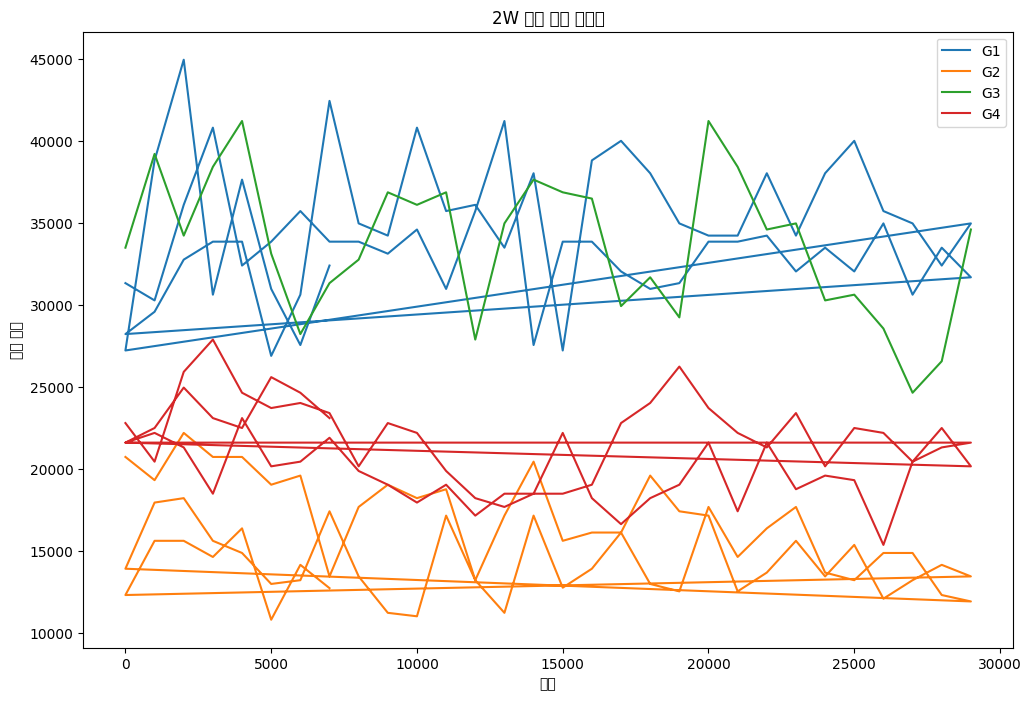

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missin

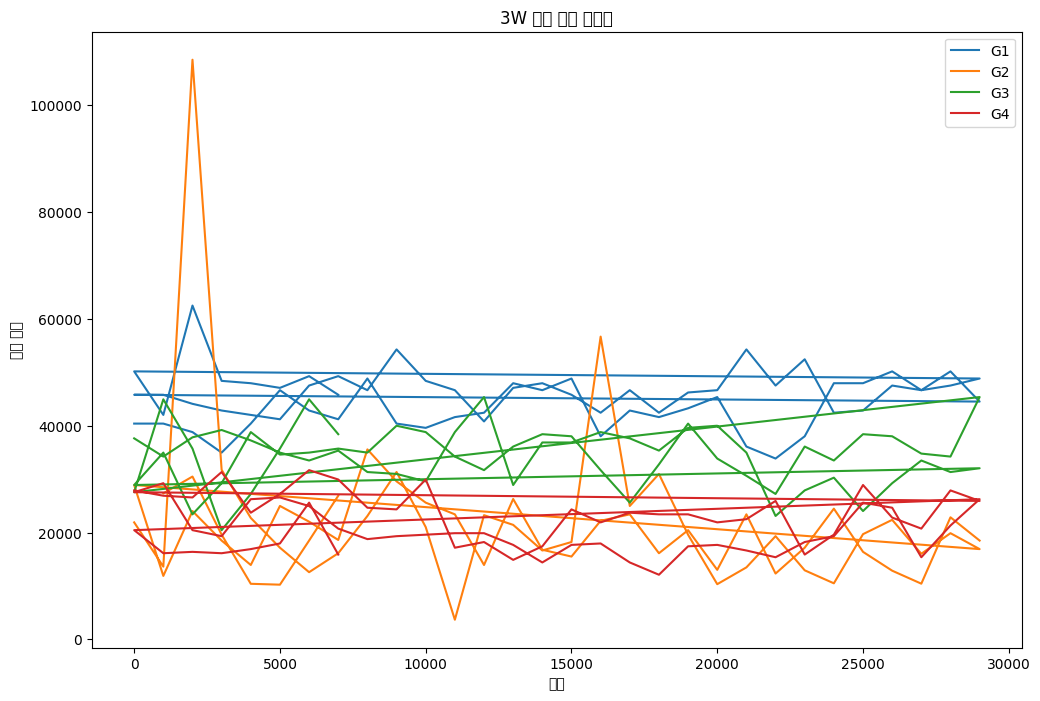

파일을 찾을 수 없습니다: D:\MultiModal\Face_z_score\G_1\Face_4W_G3_S1.xlsx


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missin

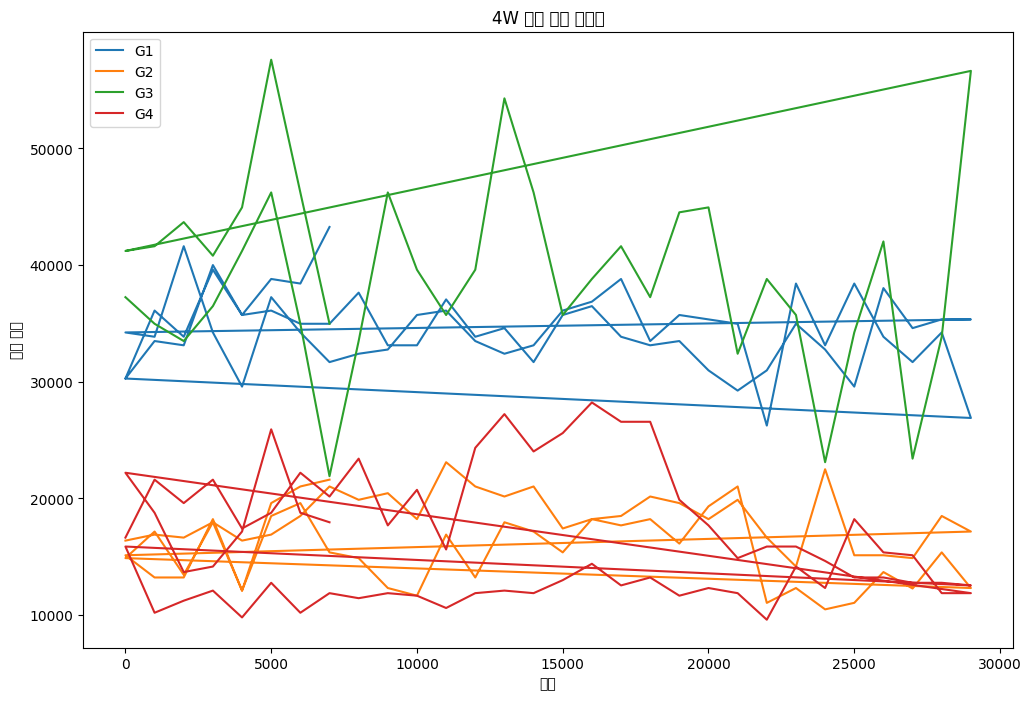

In [13]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt

# # Define the paths
# path = 'D:\\MultiModal\\Face_z_score\\G_1\\'
# save_path = 'D:\\MultiModal\\Face_z_score\\G_plot\\'
# if not os.path.exists(save_path):
#     os.makedirs(save_path) 

# # Define the lists
# weeks = ['1W', '2W', '3W', '4W']
# steps = ['S1', 'S2', 'S3']
# people = ['G1', 'G2', 'G3', 'G4']

# for week in weeks:
#     # Initialize a dictionary to store dataframes for each person across all steps
#     combined_dataframes = {person: pd.DataFrame() for person in people}

#     for step in steps:
#         for person in people:
#             file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
#             if os.path.exists(file_path):
#                 df = pd.read_excel(file_path, index_col=0)
#                 df['box.size'] = df['box.height'] * df['box.width']
#                 # Resample the data to reduce the number of points (e.g., every 1000th point)
#                 df = df.iloc[::1000, :]
#                 combined_dataframes[person] = pd.concat([combined_dataframes[person], df])
#             else:
#                 print(f"파일을 찾을 수 없습니다: {file_path}")

#     # Plot the data for the current week, combining all steps
#     plt.figure(figsize=(12, 8))

#     for person in people:
#         if not combined_dataframes[person].empty:
#             df = combined_dataframes[person]
#             plt.plot(df.index, df['box.size'], label=person)

#     plt.xlabel('시간')
#     plt.ylabel('박스 크기')
#     plt.title(f'{week} 주차 전체 그래프')
#     plt.legend()

#     plt.show()

#     # Save the plot to the specified path
#     #plot_filename = f"{week}_combined_graph.png"
#     #plot_filepath = os.path.join(save_path, plot_filename)
#     # plt.savefig(plot_filepath)
#     # plt.close()  # Close the plot to avoid display
